In [30]:
# Imports
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, balanced_accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

In [31]:
# Load data

data = pd.read_csv('filtered_data.csv')
# data = pd.read_csv('new_data.csv')

print("Columns: ", data.columns)
print("Shape: ", data.shape)

Columns:  Index(['Patient ID', 'filename', 'Recording location', 'SR', 'Murmur',
       'Outcome', 'mean', 'sc_mean', 'mels1', 'mels2', 'mels3', 'mels4',
       'mels5', 'mels6', 'mels7', 'mels8', 'mels9', 'mels10', 'mels12',
       'mels15', 'mels17', 'mels18', 'mels19', 'mels20', 'mels21', 'mels22',
       'mels23', 'mels24', 'mels25', 'mels27', 'mels28', 'mels29', 'mels30',
       'mels31', 'mels32', 'mels33', 'mels35', 'mels36', 'mels37', 'mels38',
       'mels39', 'mels43', 'mels45', 'mels46', 'mels48', 'mels50', 'mels53',
       'mels54', 'mels55', 'mels56', 'mels57', 'mels58', 'mels59', 'mels60',
       'mels63', 'mels64', 'mels65', 'mels67', 'mels68', 'mels71', 'mels70',
       'mels77', 'mels69', 'mels42', 'mels80', 'mels87', 'mels88', 'mels89',
       'mels93', 'mels94', 'mels95', 'mels101', 'mels102', 'mels104',
       'mels105', 'mels106', 'mels91', 'mels115', 'mels92', 'mels116',
       'mels112', 'mels117', 'mels120', 'mels123', 'mels122', 'mels126',
       'mels127'],
  

In [32]:
# Preprocessing
data = data.drop(['Patient ID', 'filename', 'Recording location', 'SR', 'Murmur'], axis=1)

le = LabelEncoder()
data['Outcome'] = le.fit_transform(data['Outcome'])
# Abnormal - 0, Normal - 1

X = data.drop('Outcome', axis=1)
y = data['Outcome']

#  missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [33]:
# Define the hyperparameter grid
param_grid = {
    'n_neighbors': range(1, 101),
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
    'weights': ['uniform', 'distance']
}

# Initialize GridSearchCV
knn_grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search
knn_grid.fit(X_train, y_train)

# Get the best estimator and its parameters
best_knn = knn_grid.best_estimator_
best_knn_score = knn_grid.best_score_
best_knn_params = knn_grid.best_params_

# Print the results
print("Best Estimator:", best_knn)
print("Best Accuracy:", best_knn_score)
print("Best Parameters:", best_knn_params)


Best Estimator: KNeighborsClassifier(metric='manhattan', n_neighbors=79, weights='distance')
Best Accuracy: 0.5754940711462451
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 79, 'weights': 'distance'}


In [40]:
knn = KNeighborsClassifier(n_neighbors=79, metric='manhattan', weights='distance')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [41]:
def wt_acc(cm):
  tp = cm[1][1]
  tn = cm[0][0]
  fp = cm[0][1]
  fn = cm[1][0]
  return (5*tp + tn)/(5*(tp+fn) + (tn+fp))

In [42]:
def c_algo(s):
  return 10*s
def c_expert(s, t):
  return (25 + 397*(s/t) - 1718*((s*s)/(t*t)) + 11296*((s*s*s*s)/(t*t*t*t)))
def c_treat(s):
  return 10000*s
def c_err(s):
  return 50000*s

def cost(cm):
  tp = cm[1][1]
  tn = cm[0][0]
  fp = cm[0][1]
  fn = cm[1][0]
  n = tp + tn + fp + fn
  return (c_algo(n) + c_expert(tp+fp, n) + c_treat(tp) + c_err(fn))/n

Accuracy: 0.5624012638230648
Weighted Accuracy:  0.682615629984051
Custom Cost Metric:  12997.184900693968


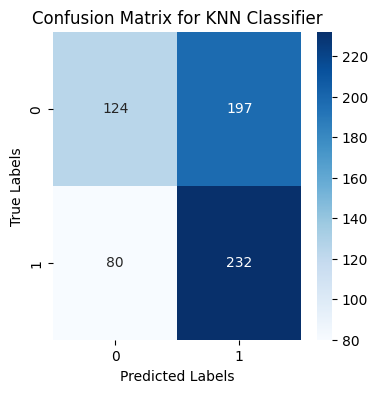

In [44]:
print("Accuracy:", accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Weighted Accuracy: ", wt_acc(cm))
print("Custom Cost Metric: ", cost(cm))

labels = knn.classes_

# Plotting confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix for KNN Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()